# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
#Type your code here
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [3]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [4]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [5]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [6]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

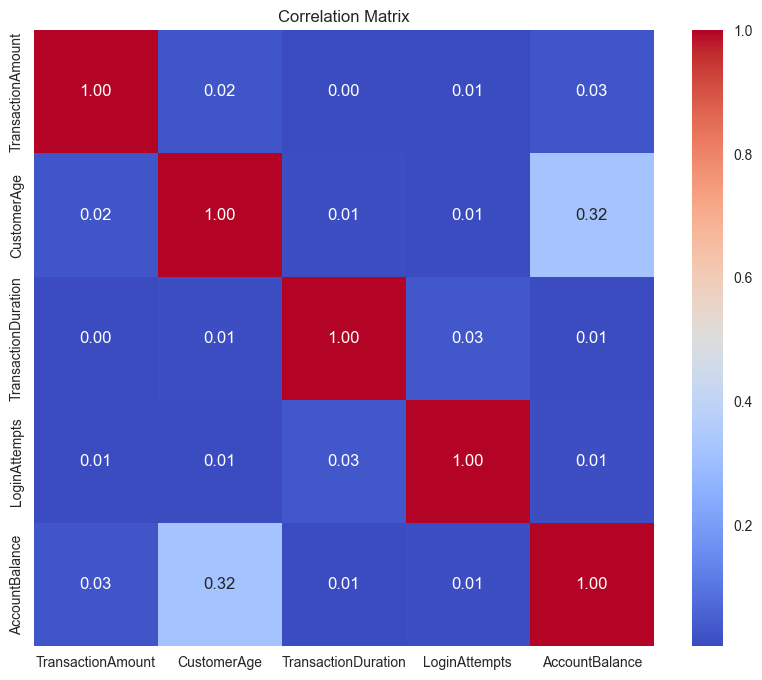

In [7]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
num_cols = selector(dtype_exclude="object")(df)
cat_cols = selector(dtype_include="object")(df)

corr = df[num_cols].corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

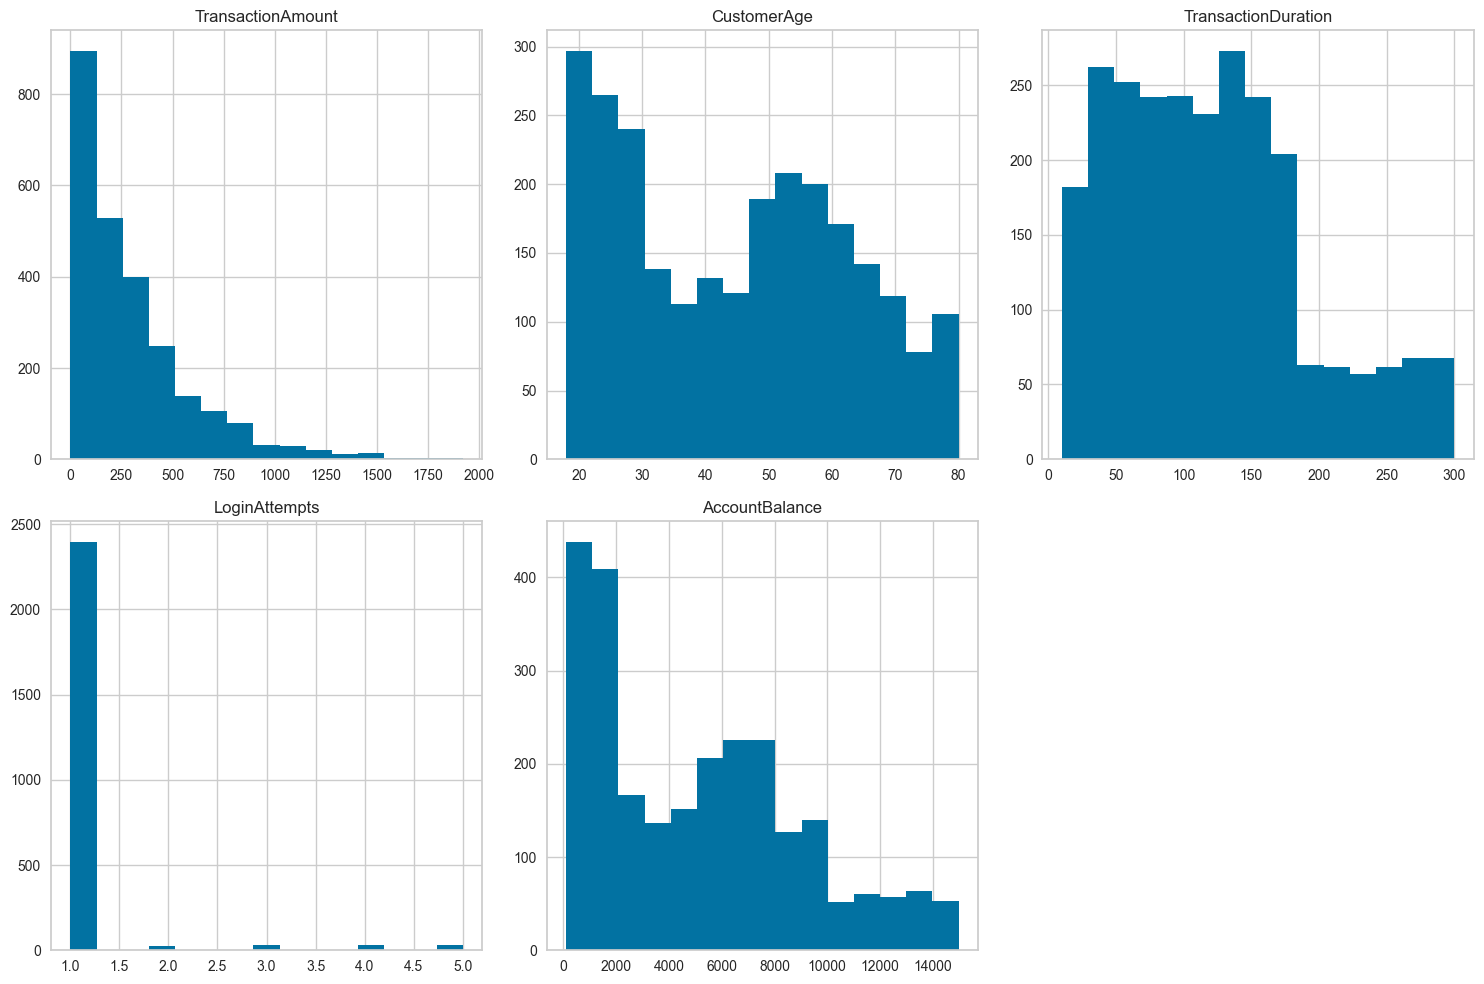

In [8]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df[num_cols].hist(bins=15, figsize=(15, 10), layout=(len(num_cols)//3 + 1, 3))
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

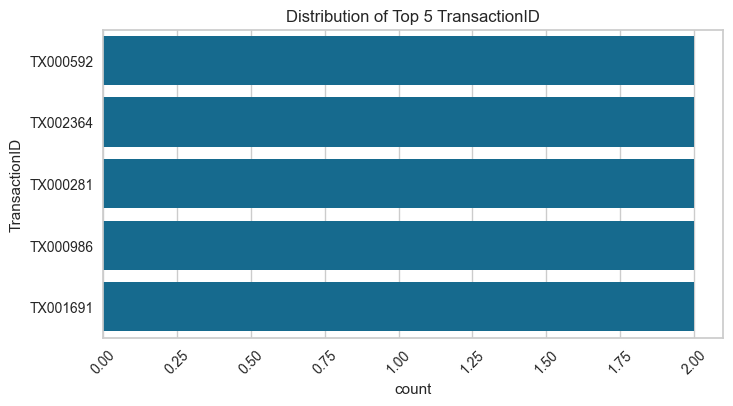

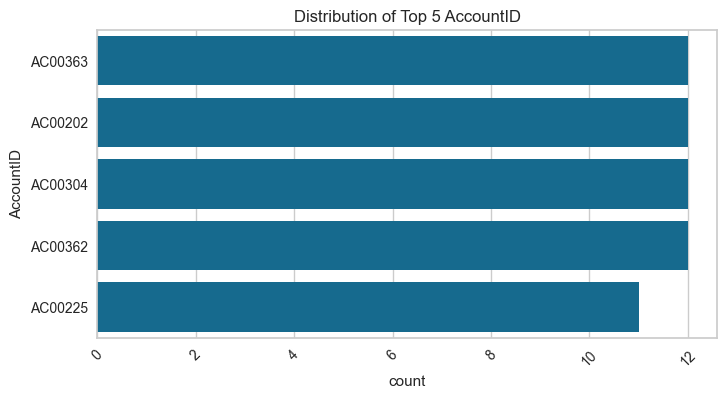

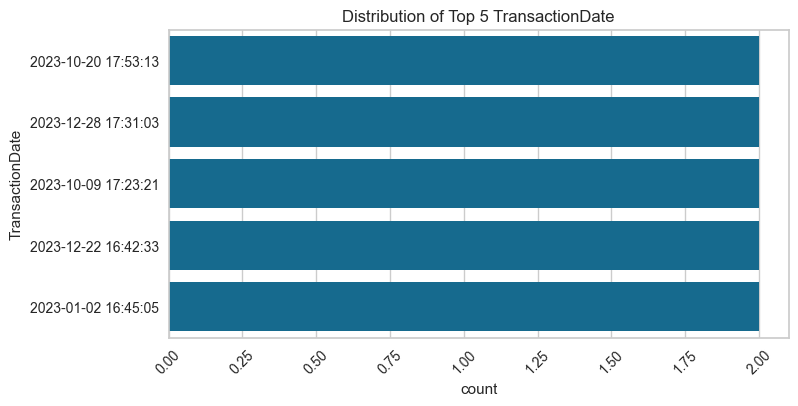

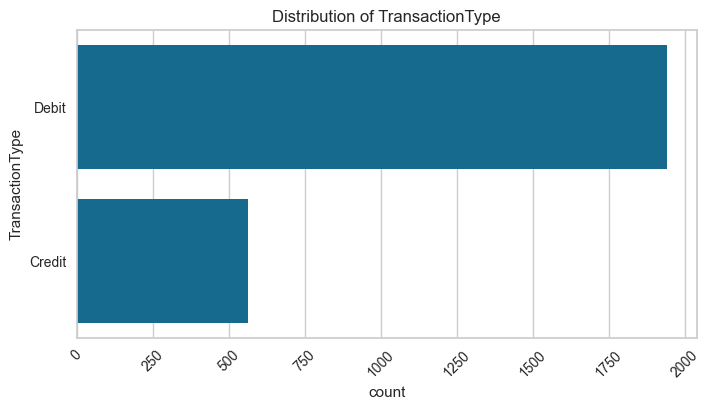

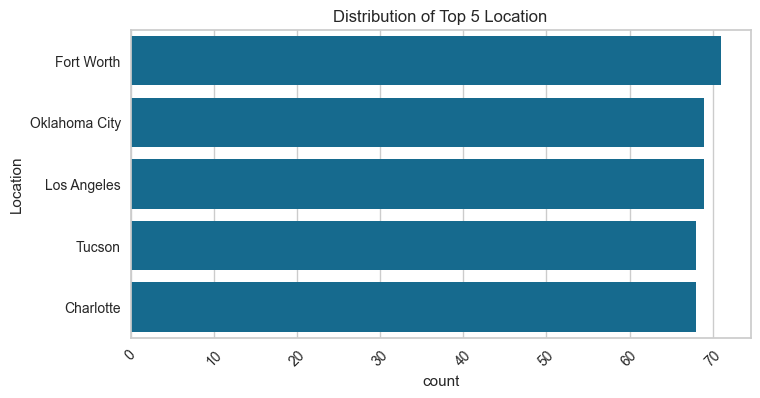

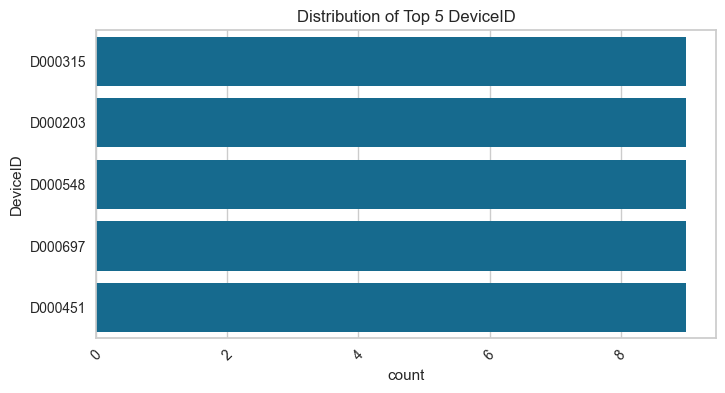

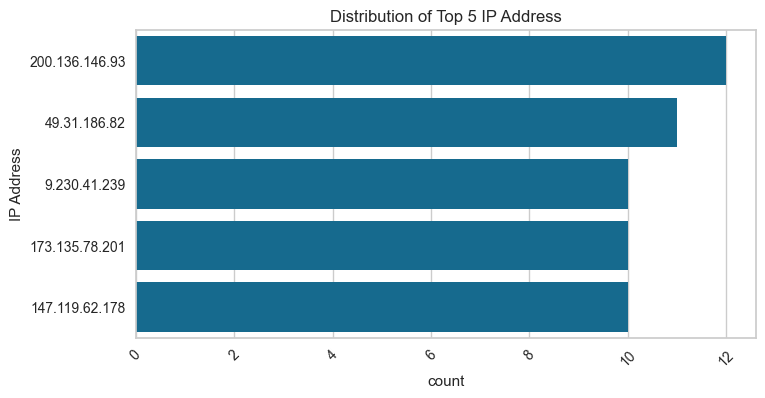

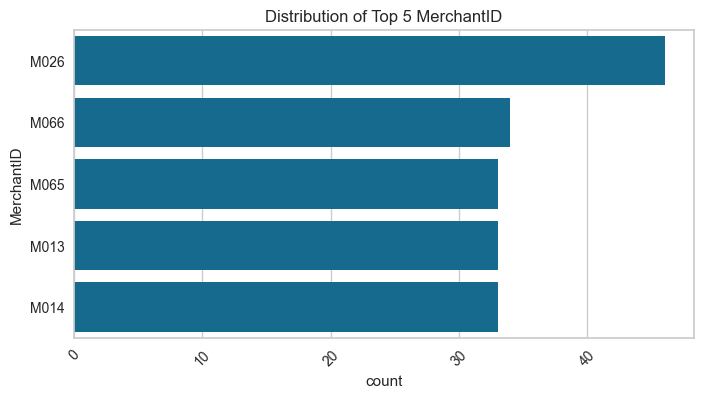

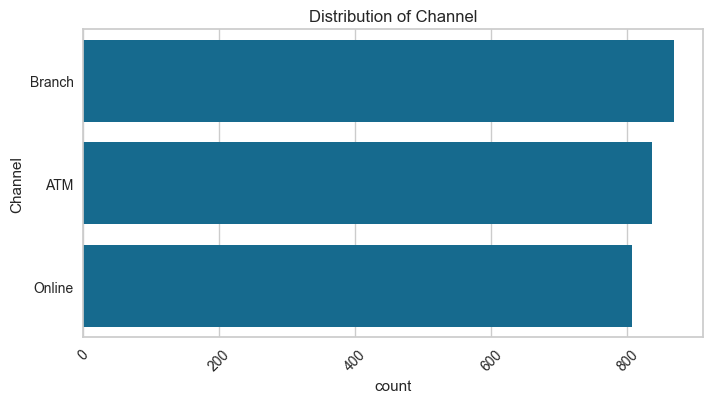

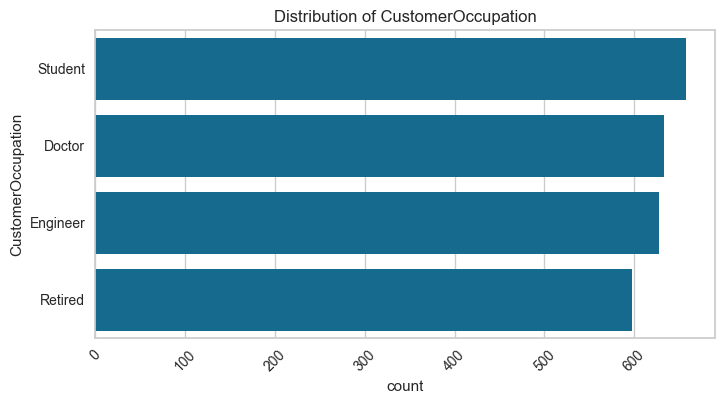

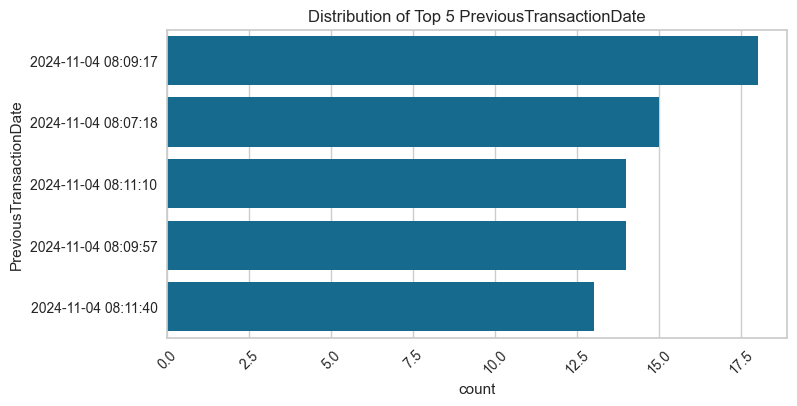

In [9]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
overlap_feature = ['Location', 'TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate']
for col in cat_cols:
    plt.figure(figsize=(8, 4))

    if col in overlap_feature:
        top5 = df[col].value_counts().nlargest(5).index
        sns.countplot(
            data=df[df[col].isin(top5)],
            y=col,
            order=top5,
        )
        plt.title(f'Distribution of Top 5 {col}')
    else:
        sns.countplot(
            data=df,
            y=col,
            order=df[col].value_counts().index,
        )
        plt.title(f'Distribution of {col}')

    plt.xticks(rotation=45)
    plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [10]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [11]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

21

In [12]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315
1,0.268963,1.307715,0.307960,-0.204629,2.218381
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694
4,-0.972736,NaN,1.121495,-0.204629,0.594263


In [13]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate'], inplace=True)

In [14]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

encoders = {}
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

df[categorical_cols].head()


,TransactionType,Location,Channel,CustomerOccupation
0,1,36,0,0
1,1,15,0,0
2,1,23,2,3
3,1,33,2,3
4,0,1,2,3


In [15]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [16]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df.dropna(inplace=True)

In [17]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

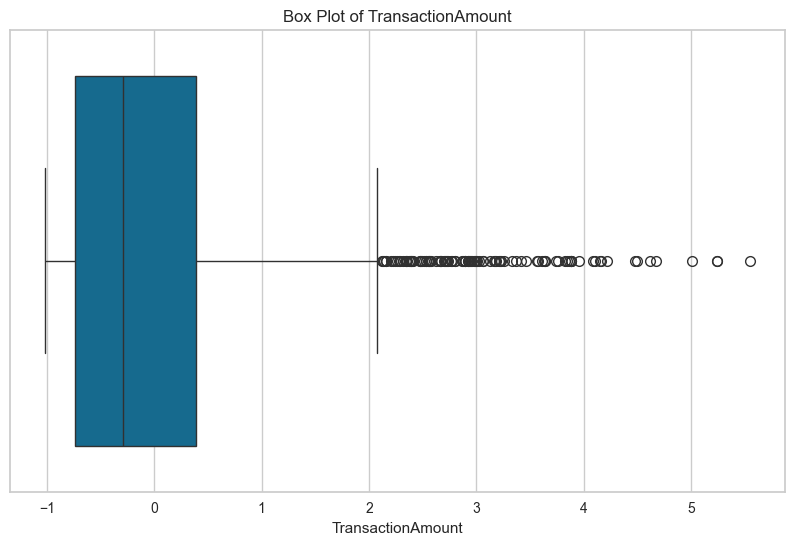

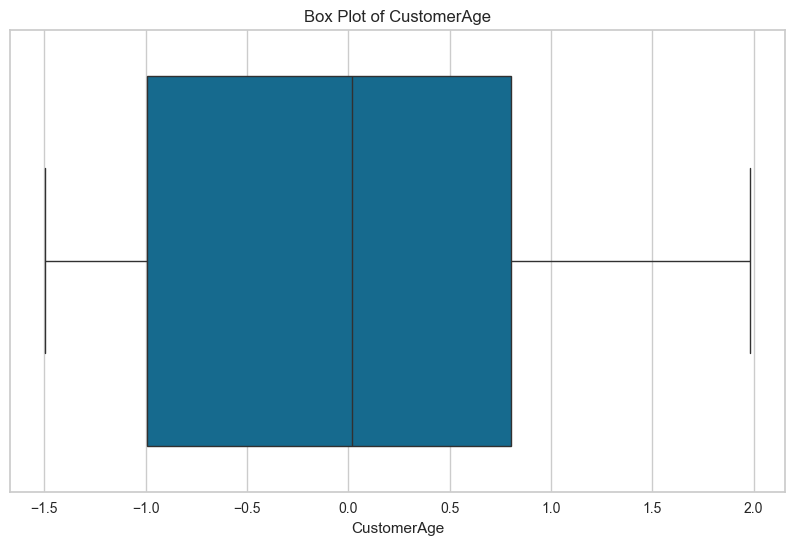

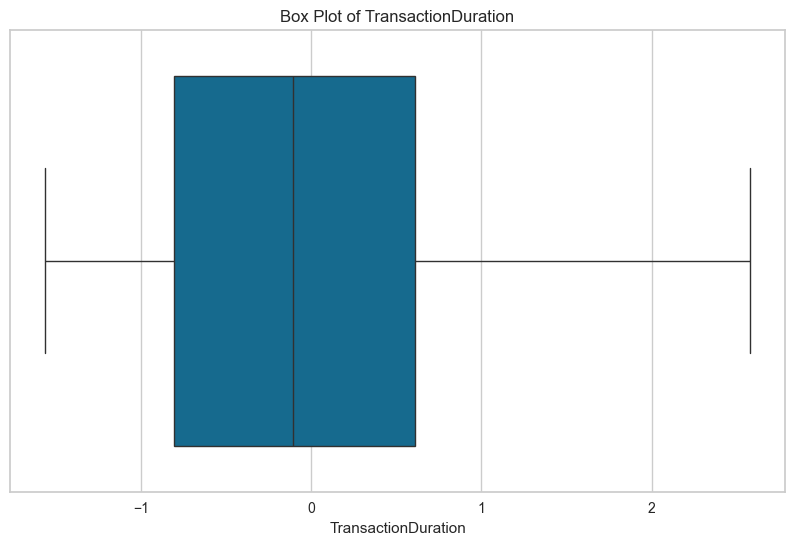

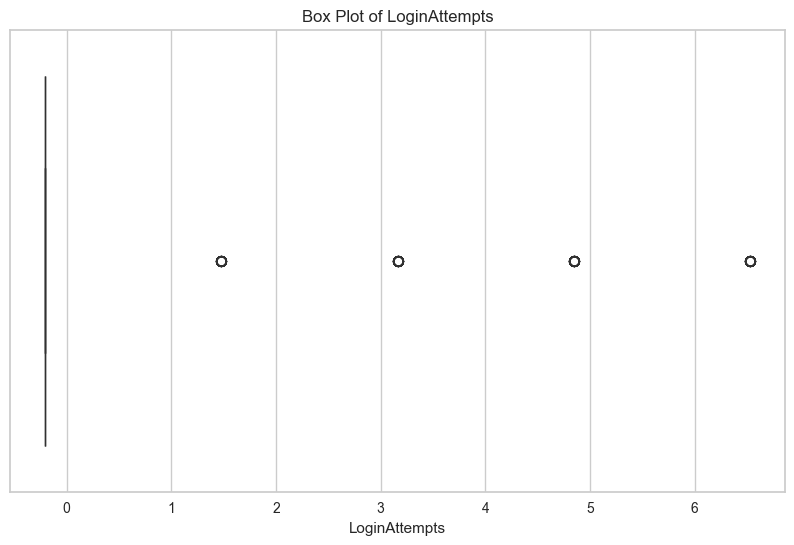

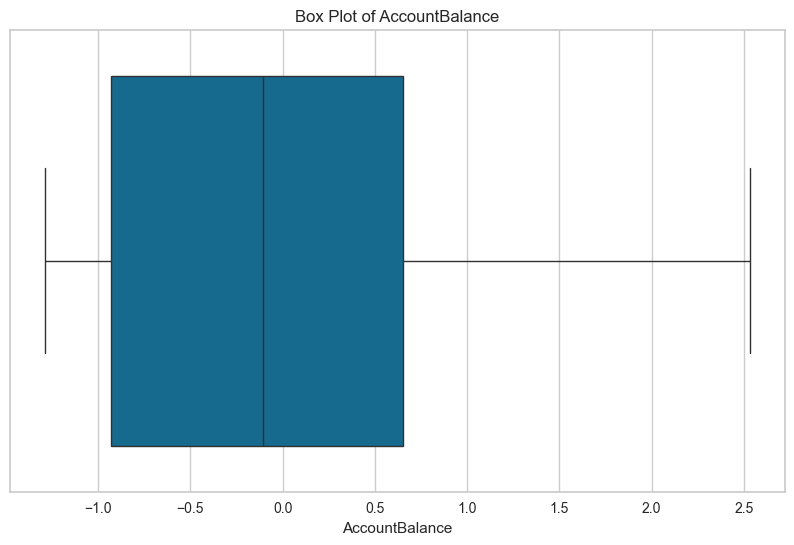

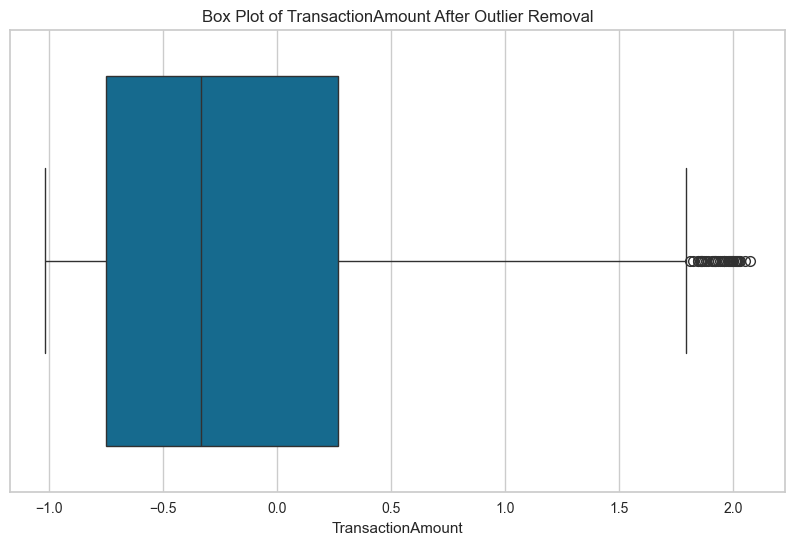

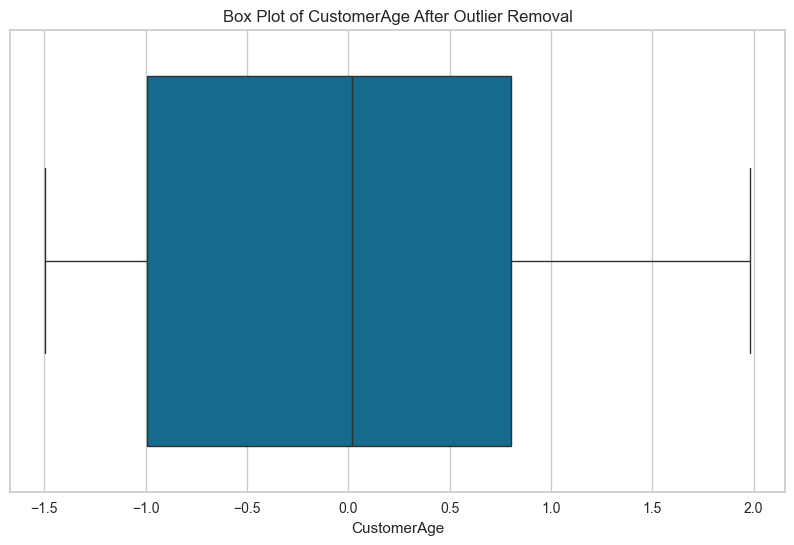

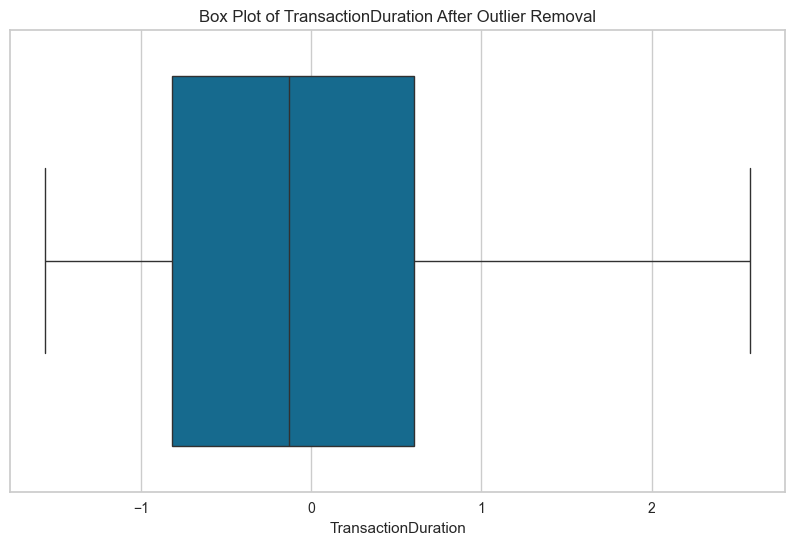

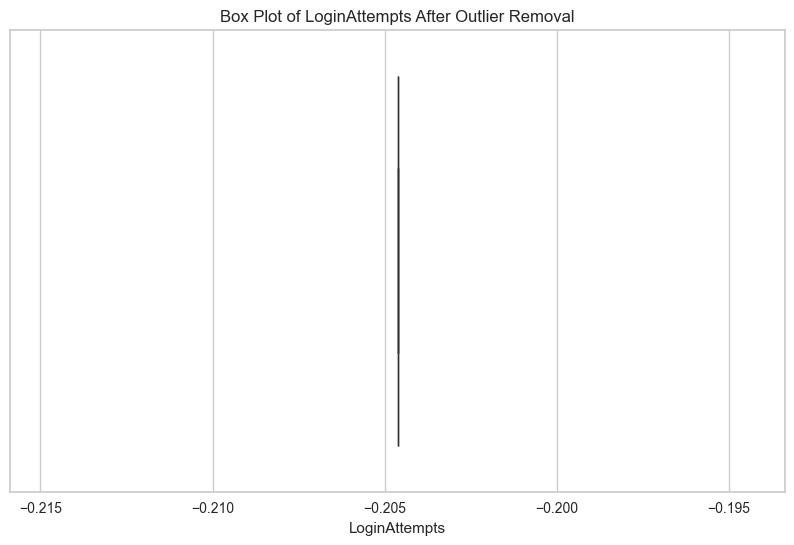

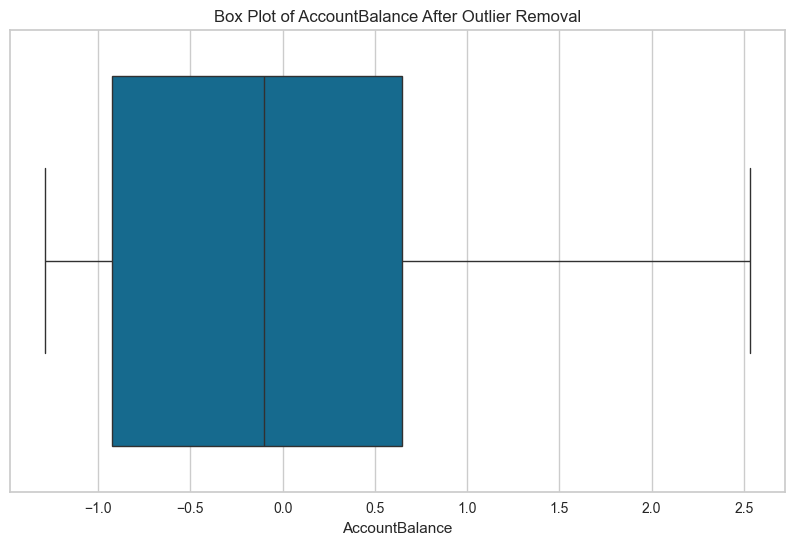

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation
count,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000
mean,-0.142863,-0.001885,-0.008744,-0.204629,-0.002762,0.789184,21.464253,1.012374,1.531164
std,0.743241,0.994964,1.000622,0.000000,0.996430,0.440408,12.444811,0.827836,1.152192
min,-1.017881,-1.495947,-1.561745,-0.204629,-1.286100,0.000000,0.000000,0.000000,0.000000
25%,-0.751189,-0.991288,-0.816004,-0.204629,-0.925975,1.000000,11.000000,0.000000,0.000000
50%,-0.336194,0.018031,-0.127353,-0.204629,-0.099533,1.000000,22.000000,1.000000,2.000000
75%,0.268287,0.803056,0.604115,-0.204629,0.647580,1.000000,32.000000,2.000000,3.000000
max,2.072523,1.980594,2.577295,-0.204629,2.531190,2.000000,43.000000,3.000000,4.000000


In [18]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

for feature in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, num_cols]

for feature in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_filtered_numeric[feature])
    plt.title(f'Box Plot of {feature} After Outlier Removal')
    plt.show()
 
# Menggabungkan kembali dengan kolom kategorikal
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_cols]], axis=1)
df.describe()
    

In [19]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

feature_to_bin = ['TransactionAmount', 'AccountBalance']

encoders_bin = {}
for col in feature_to_bin:
    df[col + '_bin'] = pd.cut(
        df[col],
        bins=3,
        labels=['Low', 'Medium', 'High']
    )
    encoder = LabelEncoder()
    # Encode label jadi angka
    df[col + '_bin'] = encoder.fit_transform(df[col + '_bin'])
    encoders_bin[col + '_bin'] = encoder
    
df


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,TransactionAmount_bin,AccountBalance_bin
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315,1,36,0,0,1,2
1,0.268963,1.307715,0.307960,-0.204629,2.218381,1,15,0,0,2,0
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091,1,23,2,3,1,1
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694,1,33,2,3,1,2
5,-0.703375,-1.495947,0.750409,-0.204629,-1.111505,1,28,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2509,-0.920781,0.634836,0.379322,-0.204629,-0.444044,1,36,1,2,1,1
2510,-0.382263,-1.215581,-1.433292,-0.204629,-0.856135,1,10,2,3,1,1
2511,-0.186796,-1.159507,-0.377123,-0.204629,-1.278402,0,17,2,3,1,1
2523,-0.977083,1.756301,-0.605484,-0.204629,-0.052396,1,27,1,2,1,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [20]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.

df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,TransactionAmount_bin,AccountBalance_bin
count,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000
mean,-0.142863,-0.001885,-0.008744,-0.204629,-0.002762,0.789184,21.464253,1.012374,1.531164,1.154445,1.256645
std,0.743241,0.994964,1.000622,0.000000,0.996430,0.440408,12.444811,0.827836,1.152192,0.566913,0.644619
min,-1.017881,-1.495947,-1.561745,-0.204629,-1.286100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.751189,-0.991288,-0.816004,-0.204629,-0.925975,1.000000,11.000000,0.000000,0.000000,1.000000,1.000000
50%,-0.336194,0.018031,-0.127353,-0.204629,-0.099533,1.000000,22.000000,1.000000,2.000000,1.000000,1.000000
75%,0.268287,0.803056,0.604115,-0.204629,0.647580,1.000000,32.000000,2.000000,3.000000,1.000000,2.000000
max,2.072523,1.980594,2.577295,-0.204629,2.531190,2.000000,43.000000,3.000000,4.000000,2.000000,2.000000


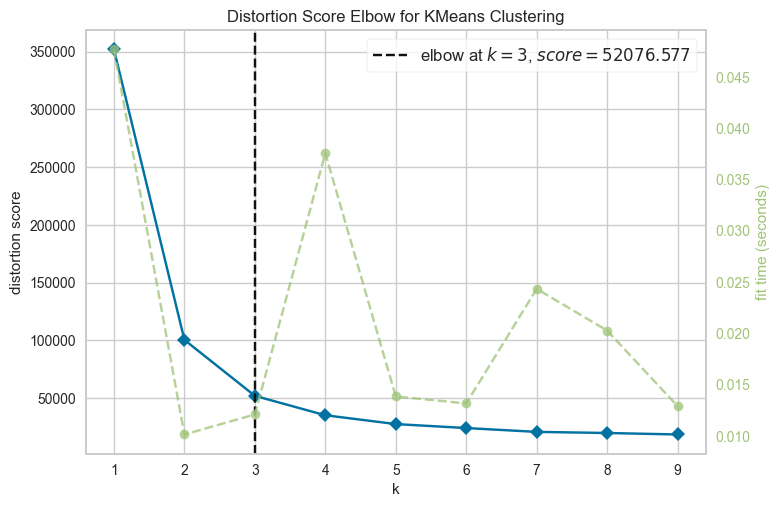

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
df_encode_numerik = df.select_dtypes(include=['float64', 'int64'])

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_encode_numerik)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [22]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_encode_numerik)
 
# Mendapatkan label cluster
df['Cluster'] = kmeans.labels_
 
# Menampilkan data cluster
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,TransactionAmount_bin,AccountBalance_bin,Cluster
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315,1,36,0,0,1,2,1
1,0.268963,1.307715,0.307960,-0.204629,2.218381,1,15,0,0,2,0,0
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091,1,23,2,3,1,1,0
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694,1,33,2,3,1,2,1
5,-0.703375,-1.495947,0.750409,-0.204629,-1.111505,1,28,0,3,1,1,0


Jalankan cell code ini untuk menyimpan model kamu.

In [23]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [24]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score

df_ss = silhouette_score(df_encode_numerik, df['Cluster'])

df_ss  


0.5009885692746323

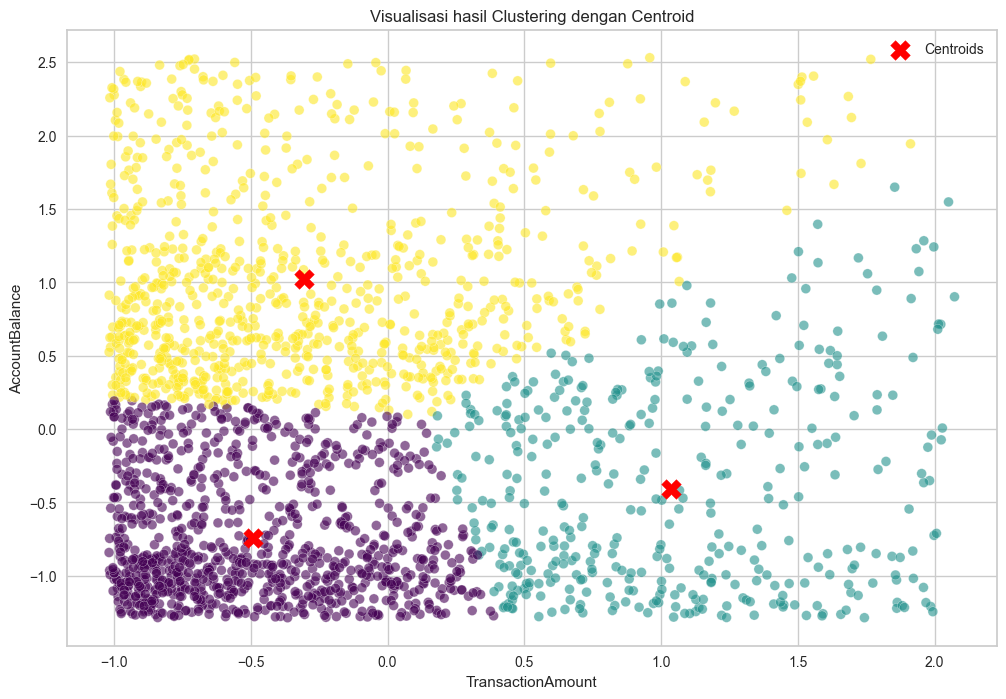

In [25]:
# Membuat visualisasi hasil clustering

# Pemilihan Feature untuk visualisasi
feature1 = 'TransactionAmount'
feature2 = 'AccountBalance'
X = df[[feature1, feature2]].values

# Latih ulang KMeans hanya dengan 2 fitur tersebut
kmeans_visual = KMeans(n_clusters=3)
labels_visualisasi = kmeans_visual.fit_predict(X)

# Visualisasi
plt.figure(figsize=(12,8))
plt.scatter(df[feature1], df[feature2], c=labels_visualisasi, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Centroid
centroids = kmeans_visual.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')


plt.title('Visualisasi hasil Clustering dengan Centroid')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [26]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
hasil_pca = pca.fit_transform(df_encode_numerik)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
data_final = pd.DataFrame(hasil_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(data_final)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [27]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [28]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

df_agg = df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'Cluster']]
agg = df_agg.groupby('Cluster').agg(['mean', 'min', 'max']).T
display(agg)

Cluster                          0         1         2
TransactionAmount   mean -0.129921 -0.143051 -0.156409
                    min  -1.017881 -1.013945 -1.017676
                    max   2.028200  2.023990  2.072523
CustomerAge         mean  0.046969 -0.068249  0.007168
                    min  -1.495947 -1.495947 -1.495947
                    max   1.980594  1.980594  1.980594
TransactionDuration mean  0.004636 -0.039530  0.005296
                    min  -1.561745 -1.561745 -1.561745
                    max   2.563023  2.520205  2.577295
LoginAttempts       mean -0.204629 -0.204629 -0.204629
                    min  -0.204629 -0.204629 -0.204629
                    max  -0.204629 -0.204629 -0.204629
AccountBalance      mean  0.004455 -0.016170  0.001881
                    min  -1.283147 -1.286100 -1.281807
                    max   2.485031  2.531190  2.522155

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0 (Nasabah stabil dengan transaksi normal)**
   - **Rata-rata (mean):**
     - TransactionAmount: -0.13
     - CustomerAge: 0.05
     - TransactionDuration: 0.00
     - LoginAttempts: -0.20
     - AccountBalance: 0.00
   - **Analisis:**
     Cluster ini mencerminkan pengguna dengan perilaku transaksi normal, memiliki saldo dan aktivitas login stabil.

2. **Cluster 1 (Pengguna muda, saldo rendah)**
   - **Rata-rata (mean):**
     - TransactionAmount: -0.14
     - CustomerAge: -0.07
     - TransactionDuration: -0.04
     - LoginAttempts: -0.20
     - AccountBalance: -0.02
   - **Analisis:**
     Cluster ini terdiri dari pengguna muda dengan saldo rendah dan aktivitas transaksi kecil.

3. **Cluster 2 (Transaksi kecil tapi rutin)**
   - **Rata-rata (mean):**
     - TransactionAmount: -0.16
     - CustomerAge: 0.01
     - TransactionDuration: 0.01
     - LoginAttempts: -0.20
     - AccountBalance: 0.00
   - **Analisis:**
     Pengguna dengan transaksi kecil tapi frekuensi transaksi dan durasi sedikit lebih tinggi.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [29]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})
display(df.head())

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,TransactionAmount_bin,AccountBalance_bin,Target
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315,1,36,0,0,1,2,1
1,0.268963,1.307715,0.307960,-0.204629,2.218381,1,15,0,0,2,0,0
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091,1,23,2,3,1,1,0
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694,1,33,2,3,1,2,1
5,-0.703375,-1.495947,0.750409,-0.204629,-1.111505,1,28,0,3,1,1,0


In [30]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# inverse dataset ke rentang normal untuk numerikal
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,TransactionAmount_bin,AccountBalance_bin,Target
0,14.09,70.0,81.0,1.0,5112.21,1,36,0,0,1,2,1
1,376.24,68.0,141.0,1.0,13758.91,1,15,0,0,2,0,0
2,126.29,19.0,56.0,1.0,1122.35,1,23,2,3,1,1,0
3,184.50,26.0,25.0,1.0,8569.06,1,33,2,3,1,2,1
5,92.15,18.0,172.0,1.0,781.68,1,28,0,3,1,1,0


In [32]:
# # inverse dataset yang sudah diencode ke kategori aslinya.
# # Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
df_inverse = df.copy()

for col in categorical_cols:
    encoder = encoders[col]
    df[col] = encoder.inverse_transform(df_inverse[col].astype(int))

for col in encoders_bin.keys():
    encoder = encoders_bin[col]
    df[col] = encoder.inverse_transform(df_inverse[col].astype(int))
# # tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,TransactionAmount_bin,AccountBalance_bin,Target
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,Low,Medium,1
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,Medium,High,0
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,Low,Low,0
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,Low,Medium,1
5,92.15,18.0,172.0,1.0,781.68,Debit,Oklahoma City,ATM,Student,Low,Low,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2182 entries, 0 to 2524
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TransactionAmount      2182 non-null   float64
 1   CustomerAge            2182 non-null   float64
 2   TransactionDuration    2182 non-null   float64
 3   LoginAttempts          2182 non-null   float64
 4   AccountBalance         2182 non-null   float64
 5   TransactionType        2152 non-null   object 
 6   Location               2154 non-null   object 
 7   Channel                2159 non-null   object 
 8   CustomerOccupation     2162 non-null   object 
 9   TransactionAmount_bin  2182 non-null   object 
 10  AccountBalance_bin     2182 non-null   object 
 11  Target                 2182 non-null   int32  
dtypes: float64(5), int32(1), object(6)
memory usage: 213.1+ KB


In [37]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

agg = df.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max']).T
display(agg)

kategori = df.select_dtypes(include='object').columns.tolist()
agg2 = df.groupby('Target')[kategori].agg(pd.Series.mode).T
display(agg2)

Target                               0             1             2
TransactionAmount   mean    259.697259    255.860893    251.958049
                    min       0.260000      1.410000      0.320000
                    max     890.240000    889.010000    903.190000
CustomerAge         mean     45.516088     43.461310     44.806276
                    min      18.000000     18.000000     18.000000
                    max      80.000000     80.000000     80.000000
TransactionDuration mean    119.747748    116.653274    119.793997
                    min      10.000000     10.000000     10.000000
                    max     299.000000    296.000000    300.000000
LoginAttempts       mean      1.000000      1.000000      1.000000
                    min       1.000000      1.000000      1.000000
                    max       1.000000      1.000000      1.000000
AccountBalance      mean   5130.801725   5050.419196   5120.768499
                    min     112.760000    101.250000    117.980000
                    max   14798.100000  14977.990000  14942.780000

Target,0,1,2
TransactionType,Debit,Debit,Debit
Location,Los Angeles,Tucson,Charlotte
Channel,Branch,Branch,Branch
CustomerOccupation,Retired,Student,Student
TransactionAmount_bin,Low,Low,Low
AccountBalance_bin,Low,Low,Low


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse

### **Cluster 0 (Retired, Los Angeles, Branch, Debit)**
- **Rata-rata (mean):**  
  - TransactionAmount: **259.70**  
  - CustomerAge: **45.52 tahun**  
  - TransactionDuration: **119.75 detik**  
  - LoginAttempts: **1 kali**  
  - AccountBalance: **Rp 5.130,80**  
- **Kategori:**  
  - TransactionAmount_bin: **Low**  
  - AccountBalance_bin: **Low**
- **Analisis:**  
  Cluster ini menggambarkan **nasabah pensiunan** dengan usia relatif lebih tinggi dibanding cluster lain.  
  Nilai transaksi dan saldo rekening termasuk **kategori rendah**, namun tetap lebih tinggi dibanding dua cluster lainnya.  
  Aktivitas login yang hanya satu kali menunjukkan perilaku **transaksi sederhana dan stabil**.  
  Lokasi dominan **Los Angeles**, dengan kanal transaksi **Branch (cabang fisik)**, menandakan kecenderungan pengguna senior yang lebih nyaman dengan transaksi langsung tatap muka.

---

### **Cluster 1 (Student, Tucson, Branch, Debit)**
- **Rata-rata (mean):**  
  - TransactionAmount: **255.86**  
  - CustomerAge: **43.46 tahun**  
  - TransactionDuration: **116.65 detik**  
  - LoginAttempts: **1 kali**  
  - AccountBalance: **Rp 5.050,42**  
- **Kategori:**  
  - TransactionAmount_bin: **Low**  
  - AccountBalance_bin: **Low**
- **Analisis:**  
  Cluster ini merepresentasikan **pengguna muda, kemungkinan mahasiswa atau pelajar**, dengan rata-rata usia di bawah 45 tahun.  
  Nilai transaksi dan saldo berada di tingkat **terendah di antara cluster lainnya**, mencerminkan pengguna dengan daya beli dan tabungan terbatas.  
  Durasi transaksi juga lebih singkat, menandakan **transaksi cepat dan efisien**.  
  Aktivitas banyak terjadi di **Tucson** melalui **Branch**, dengan jenis transaksi **Debit**, tipikal pengguna yang bertransaksi langsung dengan nominal kecil.

---

### **Cluster 2 (Student, Charlotte, Branch, Debit)**
- **Rata-rata (mean):**  
  - TransactionAmount: **251.96**  
  - CustomerAge: **44.81 tahun**  
  - TransactionDuration: **119.79 detik**  
  - LoginAttempts: **1 kali**  
  - AccountBalance: **Rp 5.120,77**  
- **Kategori:**  
  - TransactionAmount_bin: **Low**  
  - AccountBalance_bin: **Low**
- **Analisis:**  
  Cluster ini berisi **pengguna muda (pelajar atau pekerja awal)** yang memiliki saldo dan nilai transaksi sedikit lebih tinggi daripada Cluster 1.  
  Durasi transaksi sedikit lebih lama, mengindikasikan pengguna yang **lebih berhati-hati atau sering melakukan pengecekan sebelum transaksi selesai**.  
  Berlokasi di **Charlotte**, dengan kanal **Branch** dan tipe transaksi **Debit**, kelompok ini tampak **lebih aktif secara finansial** dibanding cluster mahasiswa lainnya meski tetap dalam kategori saldo rendah.

---

### **Kesimpulan Umum**
- **Seluruh cluster memiliki tingkat transaksi dan saldo rendah** (kategori “Low”), menandakan sampel data didominasi oleh pengguna dengan daya beli menengah ke bawah.  
- **Cluster 0:** Pengguna pensiunan dengan saldo sedikit lebih tinggi dan transaksi stabil.  
- **Cluster 1:** Mahasiswa dengan saldo dan nominal transaksi terendah, transaksi cepat.  
- **Cluster 2:** Mahasiswa/pekerja muda dengan saldo sedikit lebih besar, transaksi lebih hati-hati.

---

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [34]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
clustering_result = df.copy()

In [35]:
# Simpan Data
clustering_result.to_csv('data_clustering_inverse.csv', index=False)

End of Code.